# Feature Engineering 

Feature engineering is the process of transforming raw data into features.

<img src="image/fe.png"  width="400" />


In [1]:
import pandas as pd
import numpy as np
# from sklearn.impute import SimpleImputer

In [3]:
titanic = pd.read_csv('data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Binning
Data binning is a data pre-processing technique used to reduce the effects of minor observation errors. The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval.

In [11]:
# titanic['Age']
print(f">>  min {titanic['Age'].min()} , max {titanic['Age'].max()}")

>>  min 0.42 , max 80.0


In [5]:
age = titanic['Age']
df = pd.DataFrame(age)

cut_labels = ['child', 'teenage', 'young adullt', 'mid-age adult', 'old']
cut_bins = [0, 12, 18, 35, 55, float("inf")]

df['Age binning'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)
df

,Age,Age binning
0,22.0,young adullt
1,38.0,mid-age adult
2,26.0,young adullt
3,35.0,young adullt
4,35.0,young adullt
...,...,...
886,27.0,young adullt
887,19.0,young adullt
888,NaN,NaN
889,26.0,young adullt


> # Task #1
- Check min & max for Fare column. 
- Then do binning (hint for label >>> low, mid, high)

## One Hot Encoding

One hot encoding transforms categorical features to a format that works better with classification and regression algorithms.

<img src="image/one_hot_encoding.png"  width="400" />

This works very well with most machine learning algorithms. Some algorithms, like random forests, handle categorical values natively. Then, one hot encoding is not necessary. The process of one hot encoding may seem tedious, but fortunately, most modern machine learning libraries can take care of it.


In [8]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
cls = titanic['Pclass']
df = pd.DataFrame(cls)

one_hot = pd.get_dummies(titanic['Pclass'], prefix='Pclass')
df = df.join(one_hot)
df

,Pclass,Pclass_1,Pclass_2,Pclass_3
0,3,0,0,1
1,1,1,0,0
2,3,0,0,1
3,1,1,0,0
4,3,0,0,1
...,...,...,...,...
886,2,0,1,0
887,1,1,0,0
888,3,0,0,1
889,1,1,0,0


> # Task #2
- Do one hot encoding for Embarked columns

## Transformer

To map data from various distributions to a normal distribution. 

### Why

Machine learning algorithms like Linear Regression and Gaussian Naive Bayes assume the numerical variables have a Gaussian probability distribution.

Your data may not have a Gaussian distribution and instead may have a Gaussian-like distribution (e.g. nearly Gaussian but with outliers or a skew) or a totally different distribution (e.g. exponential).

As such, you may be able to achieve better performance on a wide range of machine learning algorithms by transforming input and/or output variables to have a Gaussian or more-Gaussian distribution. Power transforms like the Box-Cox transform and the Yeo-Johnson transform provide an automatic way of performing these transforms on your data.

### Some transformer

1. Log transformer
2. Box-Cox transformer
3. Yeo-Johnson transformer

In [8]:
news = pd.read_csv('data/OnlineNewsPopularity.csv')
news

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [4]:
news[' n_tokens_content'].describe()

count     200.000000
mean      526.185000
std       372.712171
min        81.000000
25%       242.500000
50%       371.000000
75%       889.500000
max      1596.000000
Name:  n_tokens_content, dtype: float64

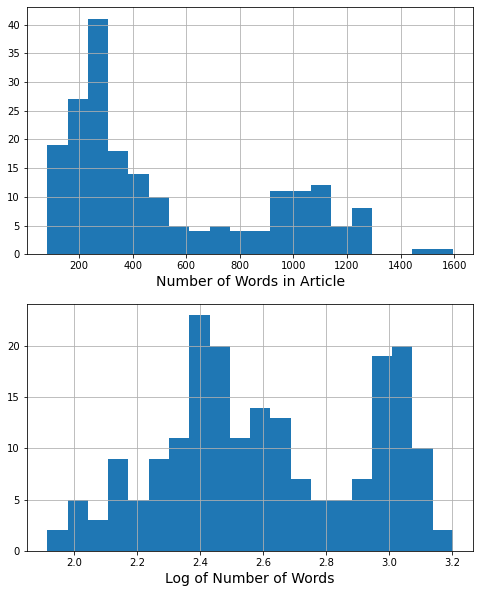

In [5]:
import matplotlib.pyplot as plt

news['log_n_tokens_content'] = np.log10(news[' n_tokens_content'] + 1)

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
news[' n_tokens_content'].hist(ax=ax1, bins=20)
news['log_n_tokens_content'].hist(ax=ax2, bins=20)
plt.show()

#### Box-Cox transformer


<img src="image/boxcox.png" />

lambda : -0.019275288717316263


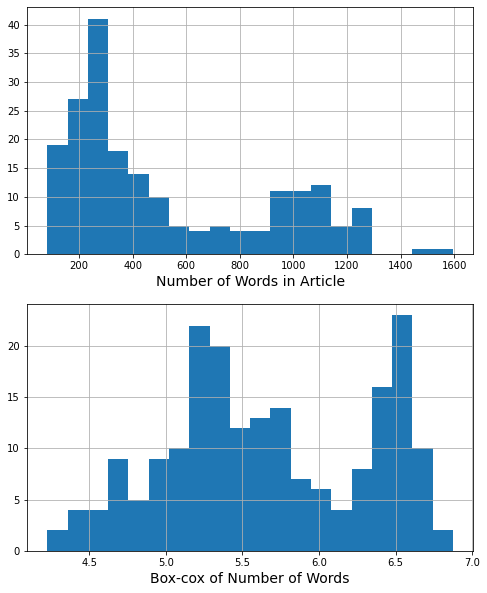

In [6]:
from scipy.stats import boxcox
from scipy.stats import yeojohnson

y = news[' n_tokens_content']+1
y,fitted_lambda= boxcox(y,lmbda=None)
print("lambda :",fitted_lambda)
news['boxcox_n_tokens_content'] = y

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax2.set_xlabel('Box-cox of Number of Words', fontsize=14)
news[' n_tokens_content'].hist(ax=ax1, bins=20)
news['boxcox_n_tokens_content'].hist(ax=ax2, bins=20)
plt.show()

#### Yeo-Johnson transformer
source : https://www.stat.umn.edu/arc/yjpower.pdf
<img src="image/yj.png" />

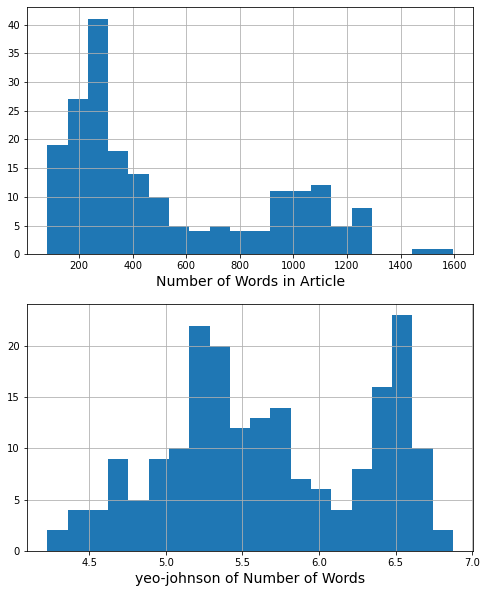

In [7]:
y = news[' n_tokens_content']
y, lmbda = yeojohnson(y)
news['yeojohnson'] = y

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax2.set_xlabel('yeo-johnson of Number of Words', fontsize=14)
news[' n_tokens_content'].hist(ax=ax1, bins=20)
news['yeojohnson'].hist(ax=ax2, bins=20)
plt.show()

> # Task #3
- Try Box-Cox Transformer for same col 
- Plot it